### Animal Faces Classification Task: Understanding Underfitting, Overfitting, Regularization, Dropout and Hyperparameter Tuning and reviweing validation

In [1]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import kagglehub

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Download the dataset
path = kagglehub.dataset_download("andrewmvd/animal-faces")
print("Path to dataset files:", path)

# Define paths (assuming standard structure: afhq/train and afhq/val with subfolders cat, dog, wild)
data_dir = os.path.join(path, 'afhq')
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'val')  # This is the test set in this task

num_classes = 3  # cat, dog, wild

# This is new way to load data(you can even set batch size by it if you want!):
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(512, 512),
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(512, 512),
    class_mode='categorical',
    shuffle=False
)

# Note: The 'val' folder is used as the test set here. If you need a validation set, split the data from the train set.

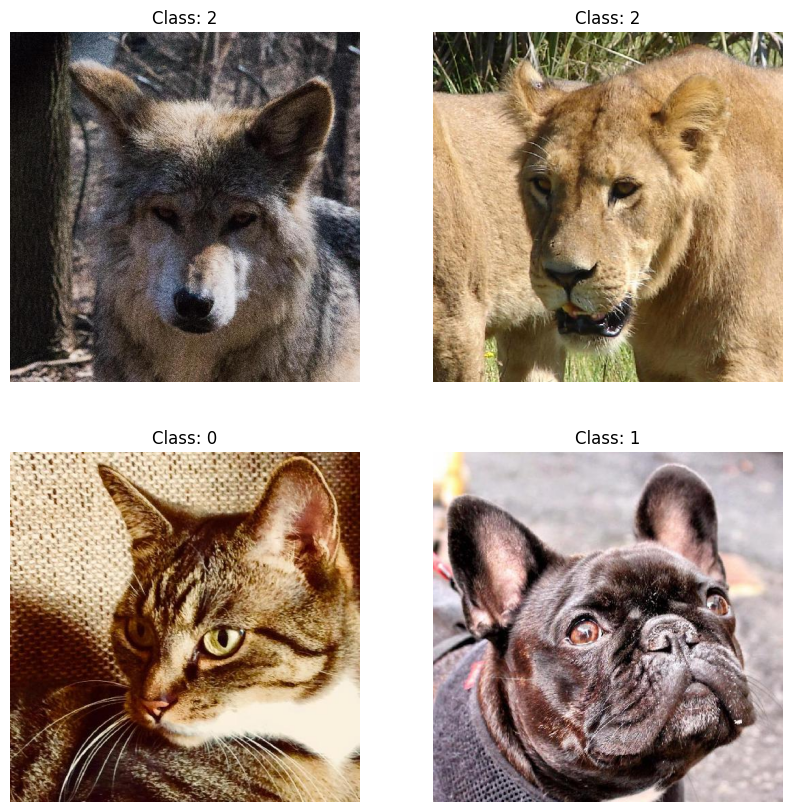

In [ ]:
# Optional: Visualize a batch of images to confirm loading
import matplotlib.pyplot as plt

images, labels = next(train_generator)  # Get one batch
plt.figure(figsize=(10, 10))
for i in range(4):  # Show first 4 images
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[i].argmax()}')
    plt.axis('off')
plt.show()

In [ ]:
# Function to plot training history (accuracy and loss curves)
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Function to evaluate on test set
def evaluate_model(model):
    test_loss, test_acc = model.evaluate(test_generator)
    print(f'Test Accuracy: {test_acc:.4f}')
    return test_acc

In [ ]:
# Cell 1: Create an underfitting model
# Goal: Design a simple ANN (e.g., few layers, small neurons) that underfits the data.
# Train it on the train set (no validation split needed here).
# Observe high bias: similar poor performance on train and test.
# After training, use plot_history(history, 'Underfitting') and evaluate_model(model)

# Your code here:
# model = Sequential([...])  # Simple CNN or MLP
# model.compile(...)
# history = model.fit(train_generator, epochs=...)
# plot_history(...)
# evaluate_model(...)

In [ ]:
# Cell 2: Create an overfitting model
# Goal: Design a complex ANN (e.g., many layers, large neurons) that overfits.
# Train for many epochs without regularization.
# Observe low bias but high variance: good on train, poor on test.
# After training, use plot_history(history, 'Overfitting') and evaluate_model(model)

# Your code here:
# model = Sequential([...])  # Complex model
# model.compile(...)
# history = model.fit(train_generator, epochs=...)
# plot_history(...)
# evaluate_model(...)

In [ ]:
# Cell 3: Add L1 Regularization
# Goal: Modify a model (perhaps the overfitting one) by adding L1 regularizers to layers.
# e.g., Dense(..., kernel_regularizer=l1(0.01))
# Train and observe how it reduces overfitting.
# Optional: Split validation from train if needed (e.g., validation_split=0.2 in fit)
# After training, plot and evaluate.

# Your code here:

In [ ]:
# Cell 4: Add L2 Regularization
# Goal: Similar to above, but use L2 (weight decay).
# e.g., Dense(..., kernel_regularizer=l2(0.01))
# Compare with L1.
# Optional validation split.
# Plot and evaluate.

# Your code here:

In [ ]:
# Cell 5: Add Dropout
# Goal: Add Dropout layers to prevent overfitting.
# e.g., Dropout(0.5) after Dense layers.
# Train, plot, evaluate.
# Optional validation.

# Your code here:

In [ ]:
# Cell 6: Hyperparameter Tuning
# Goal: Experiment with hyperparameters like learning rate, batch size, epochs, optimizer.
# Use callbacks like EarlyStopping if needed.
# e.g., optimizer=Adam(learning_rate=0.001)
# Try different values and see impact.
# Must use validation split here to tune.
# Plot and evaluate the best one.

# Your code here:

In [ ]:
# Cell 7: Combined Approach 
# Goal: Combine techniques (L1/L2, Dropout, Tuning) for balanced learning.
# Aim for good generalization: similar performance on train/val/test.
# Validation optional but recommended.
# Plot and evaluate.

# Your code here: